In [1]:
#importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading csv
df = pd.read_csv("heart.csv")

In [3]:
"""
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack
"""

"\nAge : Age of the patient\n\nSex : Sex of the patient\n\nexang: exercise induced angina (1 = yes; 0 = no)\n\nca: number of major vessels (0-3)\n\ncp : Chest Pain type chest pain type\n\nValue 1: typical angina\nValue 2: atypical angina\nValue 3: non-anginal pain\nValue 4: asymptomatic\ntrtbps : resting blood pressure (in mm Hg)\n\nchol : cholestoral in mg/dl fetched via BMI sensor\n\nfbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\n\nrest_ecg : resting electrocardiographic results\n\nValue 0: normal\nValue 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\nValue 2: showing probable or definite left ventricular hypertrophy by Estes' criteria\nthalach : maximum heart rate achieved\n\ntarget : 0= less chance of heart attack 1= more chance of heart attack\n"

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#renaming columns
new_columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'rest_ecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df.columns = new_columns
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#info about datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.shape

(303, 14)

In [8]:
#checking if there is any missing data
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#unique values
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
rest_ecg      3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [10]:
#Seperating columns
numerical_variables = ["age","trtbps","chol","thalach","oldpeak"]
categorical_variables = ['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal']
target = ["target"]

In [11]:
df[categorical_variables].describe()

,sex,cp,fbs,rest_ecg,exang,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.966997,0.148515,0.528053,0.326733,1.399340,0.729373,2.313531
std,0.466011,1.032052,0.356198,0.525860,0.469794,0.616226,1.022606,0.612277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,3.000000
max,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000


Text(0.5, 1.0, 'Correlation Matrix of Hearth Attack data')

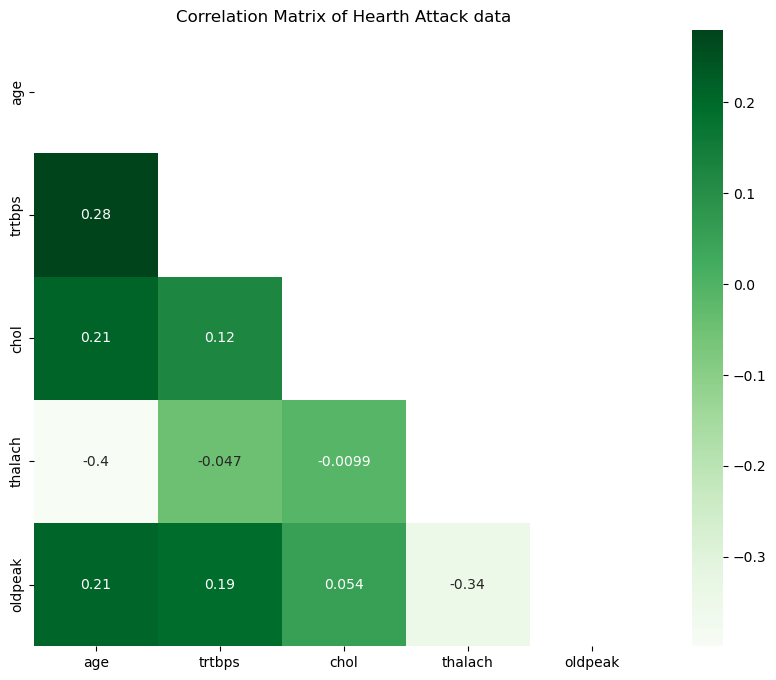

In [12]:
correlation_matrix = df[numerical_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=np.triu(np.ones_like(correlation_matrix)), annot=True, cmap='Greens')
plt.title("Correlation Matrix of Hearth Attack data")

C:\Users\cobel\AppData\Local\Temp\ipykernel_13688\3702364329.py:31: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(ax=axes[1], data=df, x="sex", hue ="sex", palette = colours, legend=False)
C:\Users\cobel\AppData\Local\Temp\ipykernel_13688\3702364329.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["Female","Male"])
C:\Users\cobel\AppData\Local\Temp\ipykernel_13688\3702364329.py:39: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(ax=axes[2], data=df, x="exang", hue ="exang", palette = colours, legend = False)
C:\Users\cobel\AppData\Local\Temp\ipykernel_13688\3702364329.py:51: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.countplot(ax=axes[4], data=df, x="cp", hue ="cp", palette = colours, legend = F

[Text(0, 0.0, ''),
 Text(0, 0.2, ''),
 Text(0, 0.4, ''),
 Text(0, 0.6000000000000001, ''),
 Text(0, 0.8, ''),
 Text(0, 1.0, '')]

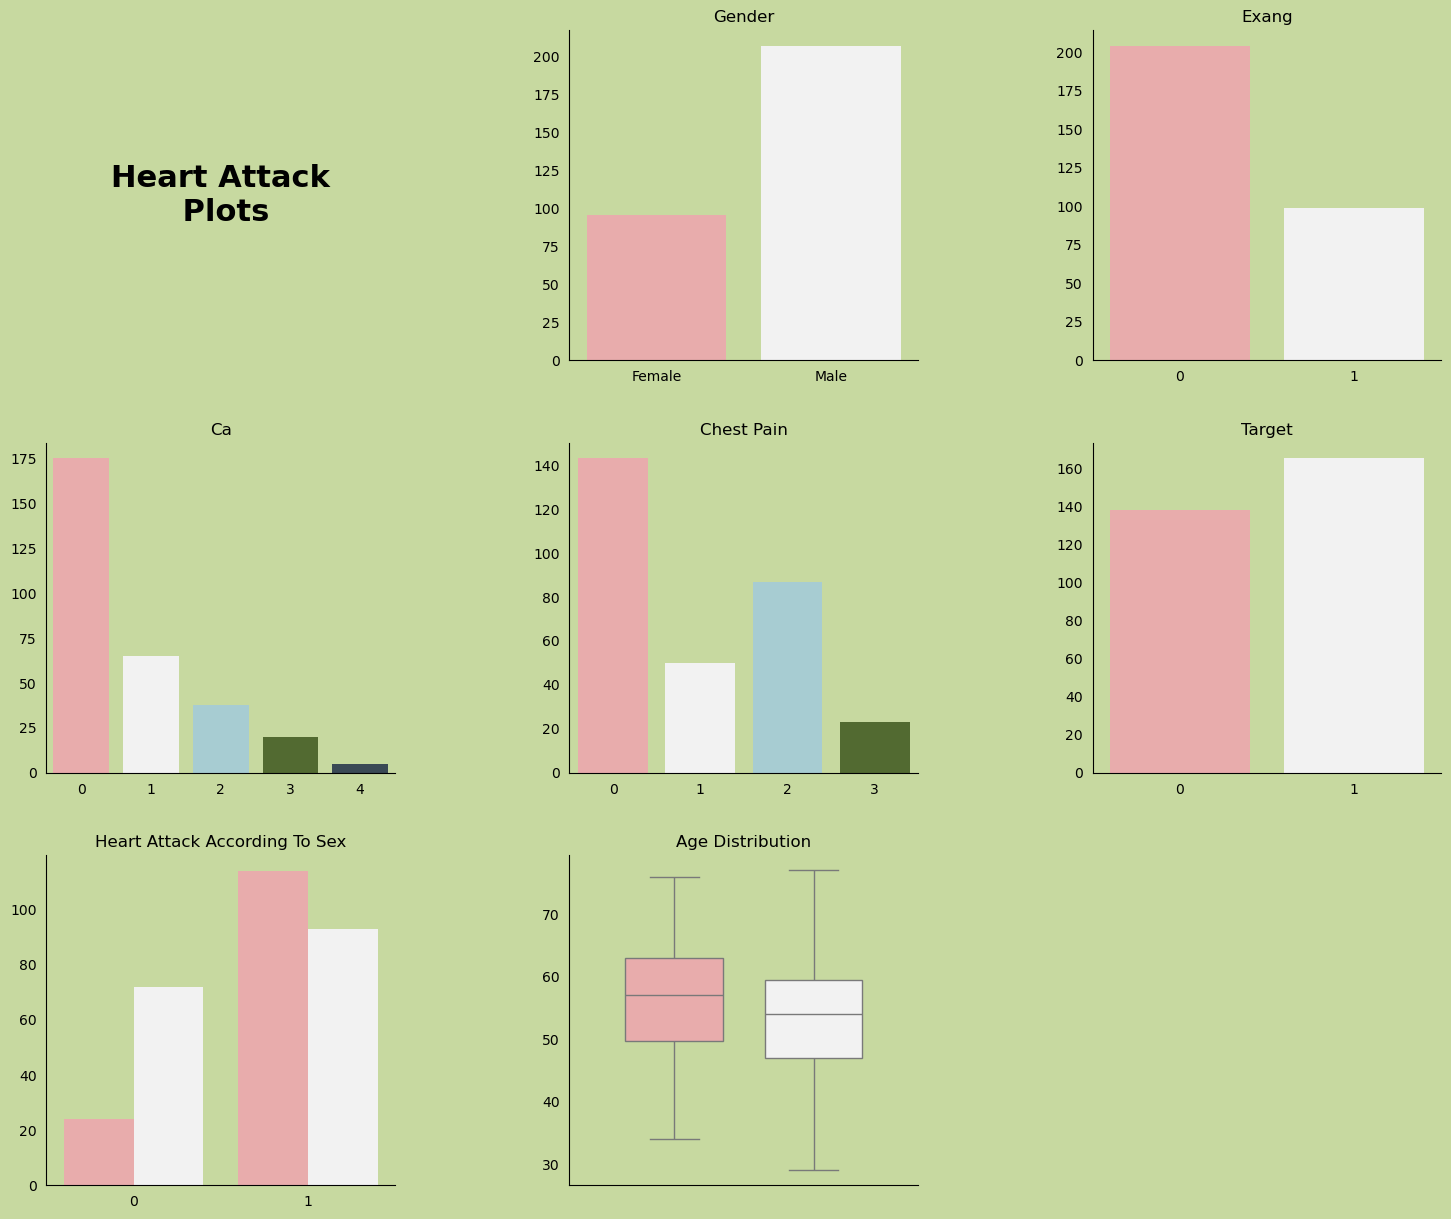

In [201]:
fig = plt.figure(figsize=(18, 15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.5, hspace=0.25)
axes = []

background_color = "#C7D9A0"
fig.patch.set_facecolor(background_color)
colours = ["#F2A2A2","#F2F2F2","#A0D1D9","#547327","#364959"]

# Create subplots using a loop
for i in range(3):
    for j in range(3):
        ax = fig.add_subplot(gs[i, j])
        ax.set_facecolor(background_color)
        ax.grid(color='#000000', linestyle=":", axis="y", dashes=(0, 1))
        ax.tick_params(left=False, bottom=False)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        axes.append(ax)

#title
axes[0].grid(color='#000000', linestyle=":", axis="y", dashes=(0, 1))
axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5,0.5,"Heart Attack\n Plots",horizontalalignment="center",verticalalignment="center",fontsize=22, fontweight="bold",
             fontfamily="sans serif")
#sex count
sns.countplot(ax=axes[1], data=df, x="sex", hue ="sex", palette = colours, legend=False)
axes[1].set_xticklabels(["Female","Male"])
axes[1].set_title("Gender")
axes[1].set_xlabel("")
axes[1].set_ylabel("")


#exang count
sns.countplot(ax=axes[2], data=df, x="exang", hue ="exang", palette = colours, legend = False)
axes[2].set_title("Exang")
axes[2].set_xlabel("")
axes[2].set_ylabel("")

#ca count
sns.countplot(ax=axes[3], data=df, x="ca", hue ="ca", palette = colours, legend = False)
axes[3].set_title("Ca")
axes[3].set_xlabel("")
axes[3].set_ylabel("")

#chaist pain type count
sns.countplot(ax=axes[4], data=df, x="cp", hue ="cp", palette = colours, legend = False)
axes[4].set_title("Chest Pain")
axes[4].set_xlabel("")
axes[4].set_ylabel("")

#target
sns.countplot(ax=axes[5], data=df, x="target", hue ="target", palette = colours, legend = False)
axes[5].set_title("Target")
axes[5].set_xlabel("")
axes[5].set_ylabel("")

#Heart Attack According To Sex
sns.countplot(ax=axes[6],data=df,x="sex", hue="target", palette = colours, legend = False)
axes[6].set_title("Heart Attack According To Sex")
axes[6].set_xlabel("")
axes[6].set_ylabel("")

#Age Distribution
sns.boxplot(ax=axes[7], data=df, y="age", hue="sex", gap= 0.3, palette = colours, legend = False)
axes[7].set_title("Age Distribution")
axes[7].set_xlabel("")
axes[7].set_ylabel("")

#title
axes[8].grid(color='#000000', linestyle=":", axis="y", dashes=(0, 1))
axes[8].spines["bottom"].set_visible(False)
axes[8].spines["left"].set_visible(False)
axes[8].tick_params(left=False, bottom=False)
axes[8].set_xticklabels([])
axes[8].set_yticklabels([])




In [183]:
#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [153]:
#Converting Categorical Variables To Pandas Dummies
df1 = df
df1 = pd.get_dummies(df1, columns=categorical_variables, drop_first = True)
X = df1.drop(['target'],axis=1)
y = df1[['target']]
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=0)

sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [191]:
#Modeling
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train.values.ravel())
y_pred = logr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train,y_train.values.ravel())
y_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))

svc = SVC(kernel='rbf')
svc.fit(X_train,y_train.values.ravel())
y_pred = svc.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, y_pred))

gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())
y_pred = gnb.predict(X_test)
print("GNB Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Accuracy: 0.85
KNN Accuracy: 0.79
SVC Accuracy: 0.8
GNB Accuracy: 0.83
